# Decision Tree for Regression Problem

## Import library and dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes
dataset = load_diabetes()

In [3]:
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

## Convert Data into DataFrame

In [7]:
diabets_df= pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
diabets_df['target']=dataset.target

In [8]:
diabets_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


## split data into train and text


In [11]:
# Dependent and Independent features
X= diabets_df.drop('target', axis=1)
y= diabets_df['target']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
17,0.070769,0.050680,0.012117,0.056301,0.034206,0.049416,-0.039719,0.034309,0.027364,-0.001078
66,-0.009147,0.050680,-0.018062,-0.033213,-0.020832,0.012152,-0.072854,0.071210,0.000272,0.019633
137,0.005383,-0.044642,0.049840,0.097615,-0.015328,-0.016345,-0.006584,-0.002592,0.017036,-0.013504
245,-0.027310,-0.044642,-0.035307,-0.029770,-0.056607,-0.058620,0.030232,-0.039493,-0.049872,-0.129483
31,-0.023677,-0.044642,-0.065486,-0.081413,-0.038720,-0.053610,0.059685,-0.076395,-0.037129,-0.042499


In [13]:
# Correlation
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.171161,0.184695,0.314569,0.270283,0.218952,-0.043783,0.180038,0.268422,0.281806
sex,0.171161,1.000000,0.033934,0.179283,0.021069,0.120205,-0.355094,0.320490,0.113187,0.165951
bmi,0.184695,0.033934,1.000000,0.394309,0.266467,0.261560,-0.354655,0.430974,0.468473,0.404928
bp,0.314569,0.179283,0.394309,1.000000,0.239978,0.161457,-0.120827,0.212785,0.375295,0.374647
s1,0.270283,0.021069,0.266467,0.239978,1.000000,0.891063,0.053003,0.546840,0.528543,0.330773
s2,0.218952,0.120205,0.261560,0.161457,0.891063,1.000000,-0.190658,0.654675,0.307139,0.293291
s3,-0.043783,-0.355094,-0.354655,-0.120827,0.053003,-0.190658,1.000000,-0.736685,-0.372437,-0.288236
s4,0.180038,0.320490,0.430974,0.212785,0.546840,0.654675,-0.736685,1.000000,0.613472,0.431352
s5,0.268422,0.113187,0.468473,0.375295,0.528543,0.307139,-0.372437,0.613472,1.000000,0.478967
s6,0.281806,0.165951,0.404928,0.374647,0.330773,0.293291,-0.288236,0.431352,0.478967,1.000000


<Axes: >

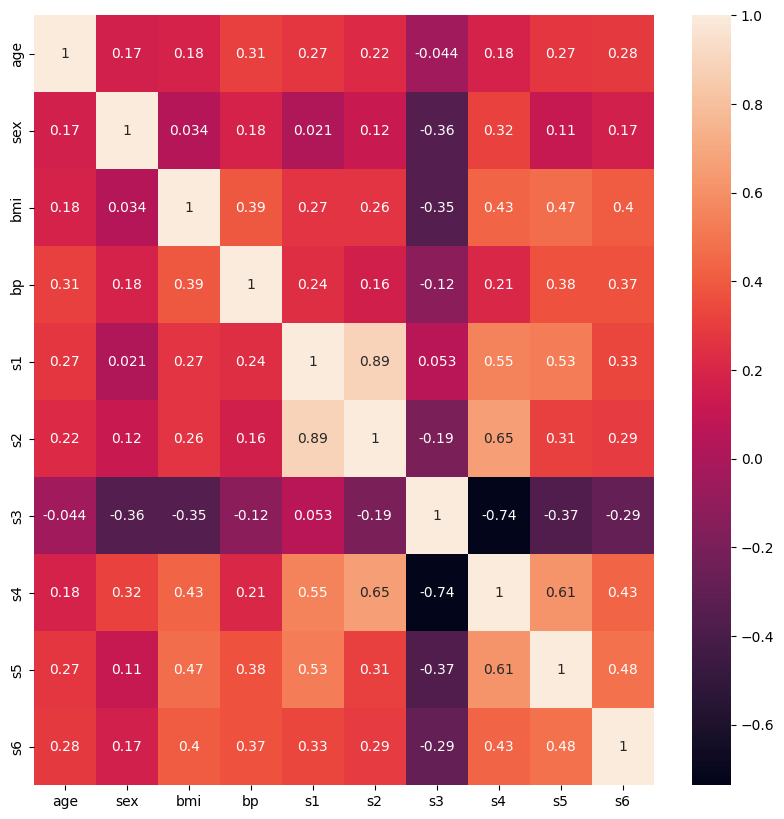

In [14]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(X_train.corr(), annot=True)

## Modeling

In [15]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

## HyperParameters Tuning

In [16]:
param  = {
    'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10],
    'max_features':['auto','sqrt','log2']
}

In [18]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=regressor, param_grid=param, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
800 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
800 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [19]:
grid_search.best_params_

{'criterion': 'poisson',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

## Prediction

In [20]:
y_pred = regressor.predict(X_test)

In [21]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

In [22]:
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

R2 Score: 0.11494257584473011
Mean Absolute Error: 53.01123595505618
Mean Squared Error: 4689.168539325843


In [23]:
selectModel = DecisionTreeRegressor(criterion = 'poisson',
 max_depth = 3,
 max_features= 'log2',
 splitter = 'best')

In [24]:
selectModel.fit(X_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=3, max_features='log2')

In [25]:
selecModel_pred = selectModel.predict(X_test)

In [26]:
print('R2 Score:', r2_score(y_test, selecModel_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, selecModel_pred))
print('Mean Squared Error:', mean_squared_error(y_test, selecModel_pred))

R2 Score: 0.43495814662068344
Mean Absolute Error: 43.93280009608311
Mean Squared Error: 2993.677483466687


## Visualize Decision Tree

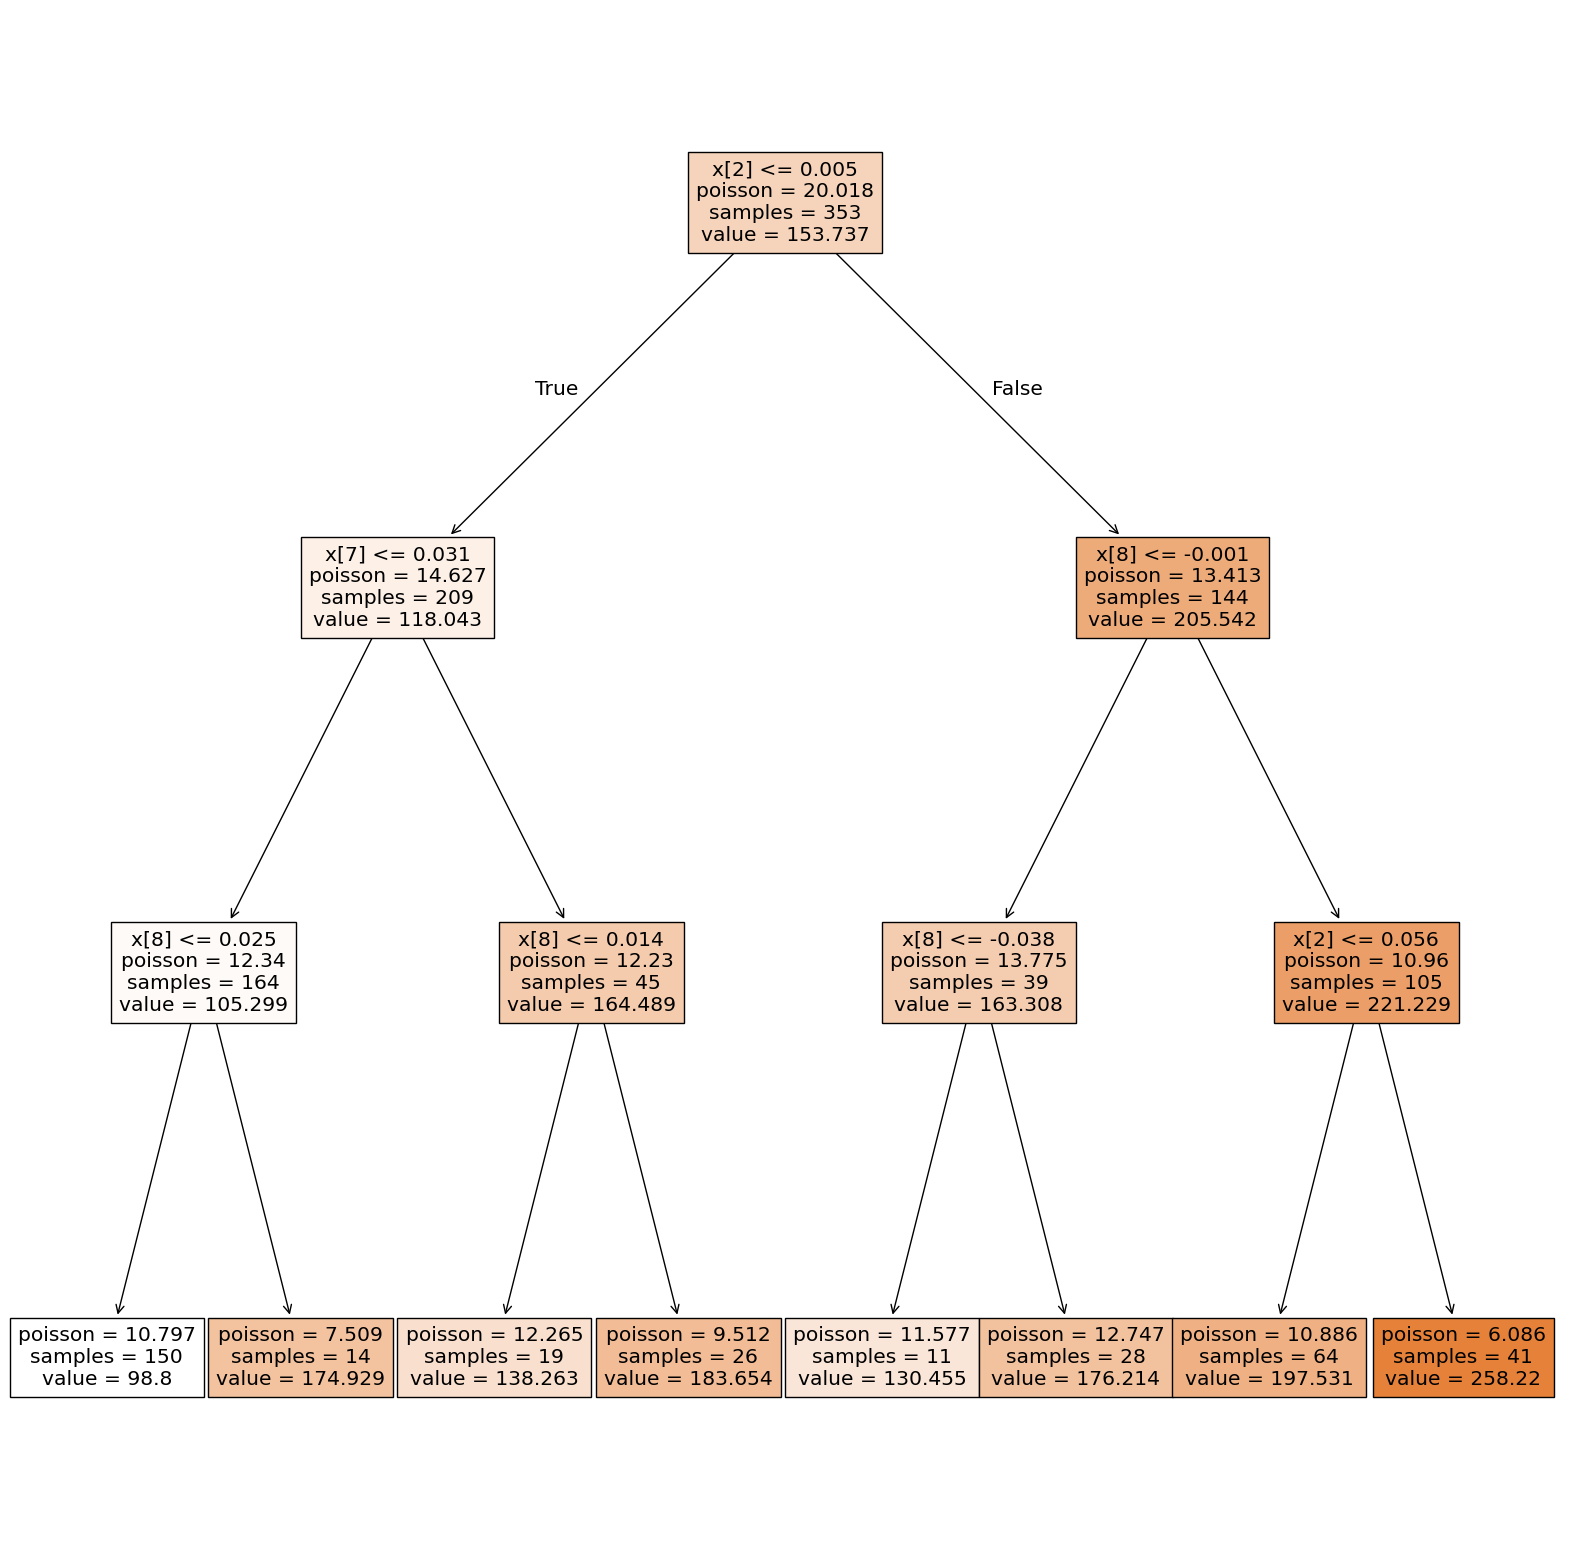

In [27]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(selectModel, filled=True)
plt.show()